## University admit eligibility predictor

## Data preprocessing

# importing the libraries 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the Dataset

In [5]:
data = pd.read_csv('Admission_Predict.csv')

# Analyze the Data

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [8]:
print(f'No of Rows in the dataset : {data.shape[0]}')
print(f'No of Columns in the dataset : {data.shape[1]}')

No of Rows in the dataset : 400
No of Columns in the dataset : 9


# Descriptive Statistics

In [9]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
data.skew()

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

# Handling Missing Values

In [11]:
data.drop('Serial No.', inplace=True, axis=1)

In [12]:
# Serial no is removed by using drop fucntion 

In [13]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [14]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
data = data.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'})

In [16]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Dataset doesn't have any null values

# Check for Categorical columns

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [18]:
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

#### Data types are in right format 

# Data Visualization 

### Univariate Analysis

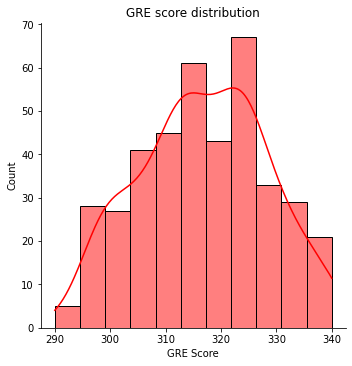

In [19]:
sns.displot(x=data["GRE Score"], kde=True, color='red')
plt.title("GRE score distribution");

In [20]:
# observation for GRE Score:
# score is distributed in the range of 290 to 340 
# peaks are observed between 310 to 330 indicating most applicants have scored in this range

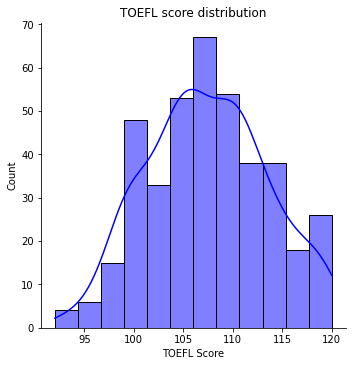

In [21]:
sns.displot(x=data["TOEFL Score"], kde=True, color='blue')
plt.title("TOEFL score distribution");

In [22]:
# observation for TOFEL score:
# TOEFL scores are distributed in the range of 90 to 120
# A good number of applicants have scored in between 100 to 115 

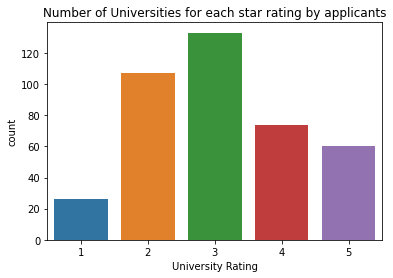

In [23]:
sns.countplot(x=data["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");

In [24]:
# observatin on university rating :
# close to 130 applicants have marked their univeristy as 3 star 
# 1 star is given by only 30 applicants which is lowest
# 3 stars are followed by 2 stars for universities 

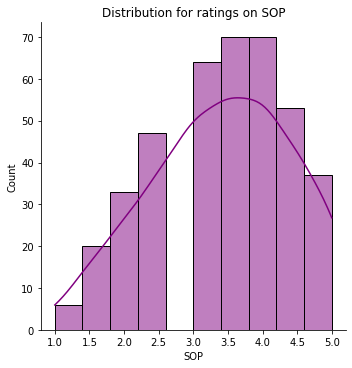

In [25]:
sns.displot(x=data["SOP"], kde=True, color='purple');
plt.title("Distribution for ratings on SOP");

In [26]:
# observation for statement of purpose:
# most of the applicants have received 3.0 to 4.0 stars in their sop.
# based on the plot, rating distribution can be bucketed in 3 sections 1.0 to 26 as low
# rating and 3.0 to 5.0 as high level of ratings 

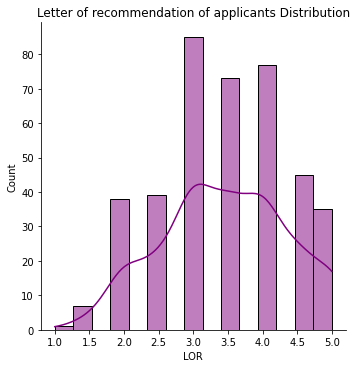

In [27]:
sns.displot(x=data["LOR"], kde=True, color='purple');
plt.title("Letter of recommendation of applicants Distribution");

In [28]:
# observation for LOR
# most applicants have a recommendation ratting of 3.0
# a very good number of applicants are having LOR ratting between 3 to 4 inclusive 

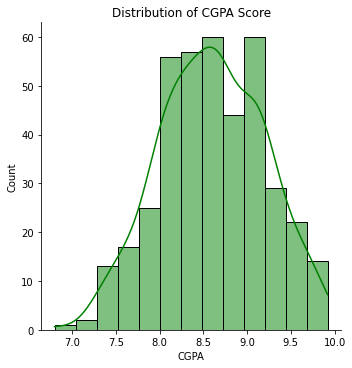

In [29]:
sns.displot(x=data["CGPA"], kde=True, color='green');
plt.title("Distribution of CGPA Score");

In [30]:
# observation for CGPA
# CGPA scores are distributed in range of 6.8 to 9.92 inclusive
# more than 70 applicants have the CGPA of 8.67

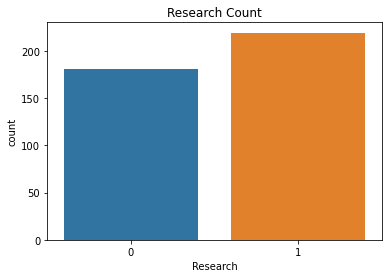

In [31]:
sns.countplot(x=data["Research"]);
plt.title("Research Count");

In [32]:
# observation on research :
# out of 400 applicants approx 240 applicants have opened for research 
# in precentage 64% applicants are chosing for research option


## Bivariate Analysis

In [33]:
cols = data.columns

In [34]:
features = [i for i in data.columns if i != 'Chance of Admit']
label = 'Chance of Admit'

In [35]:
features

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

[]

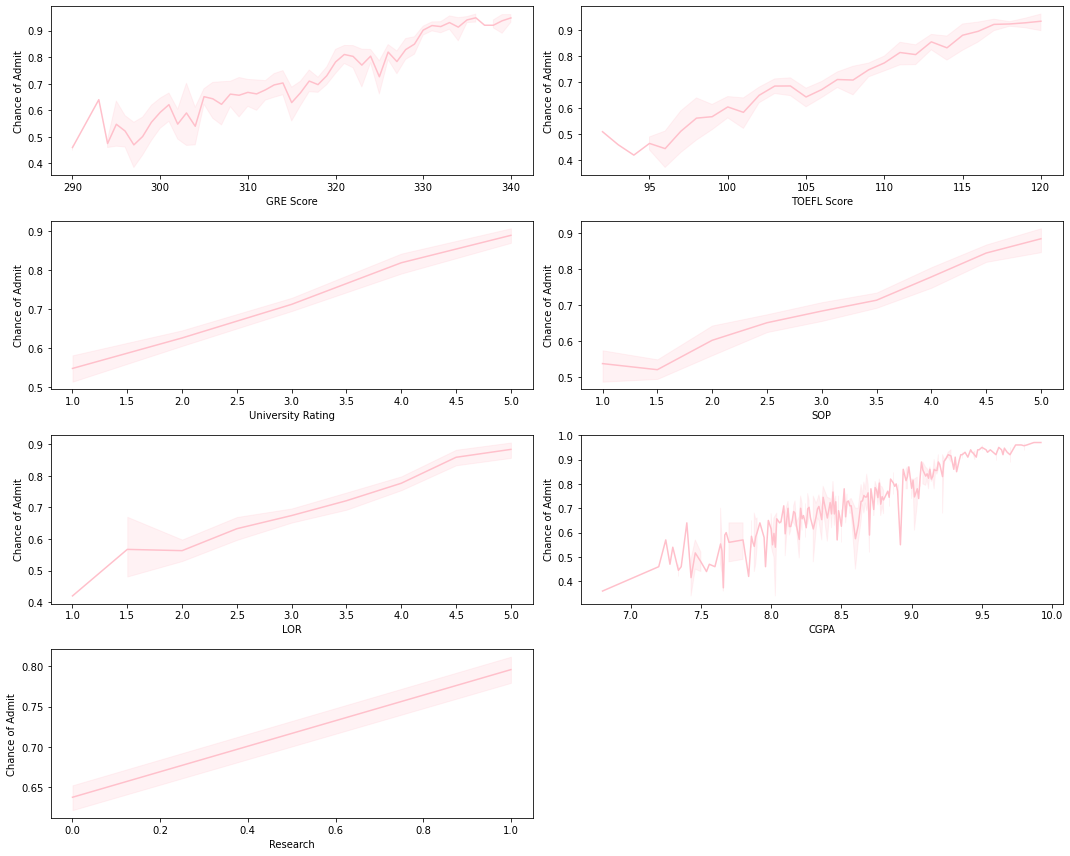

In [36]:
plt.figure(figsize=(15, 12))
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.lineplot(x=features[i], y=label, data=data, color='pink')
plt.tight_layout()   
plt.plot()

[]

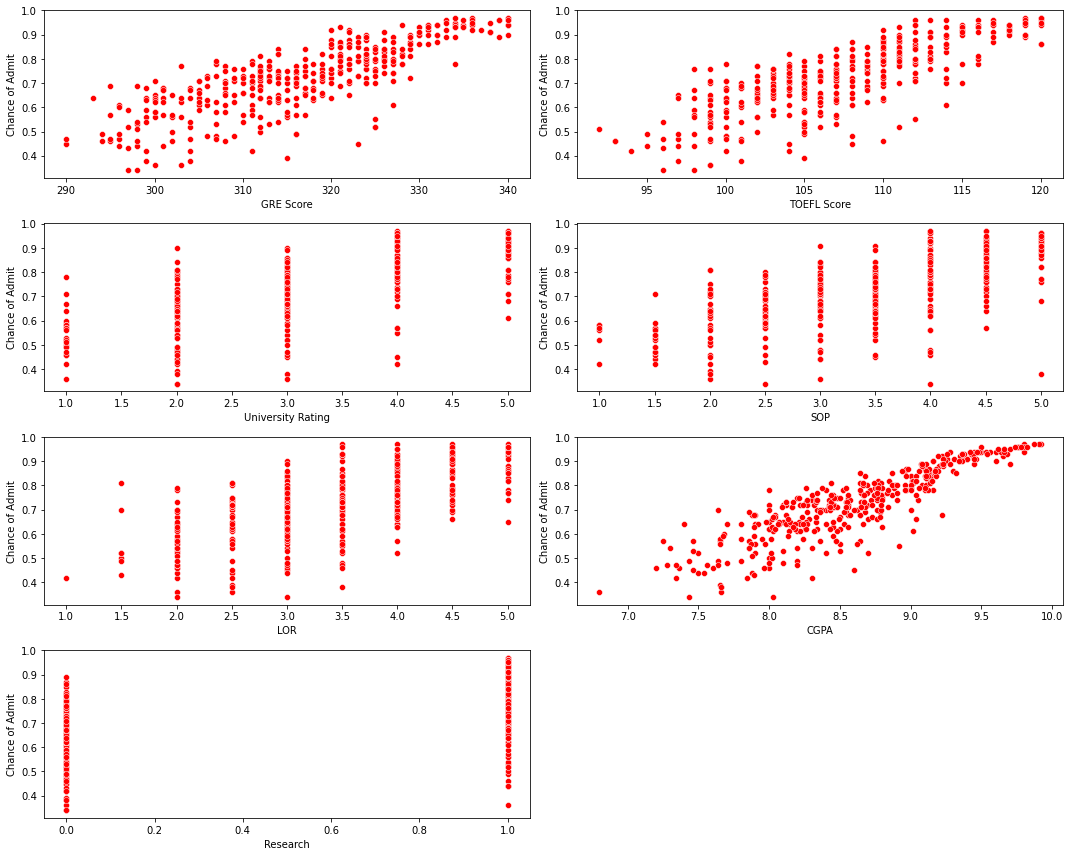

In [37]:
plt.figure(figsize=(15, 12))
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=features[i], y=label, data=data, color='red')
plt.tight_layout()   
plt.plot()

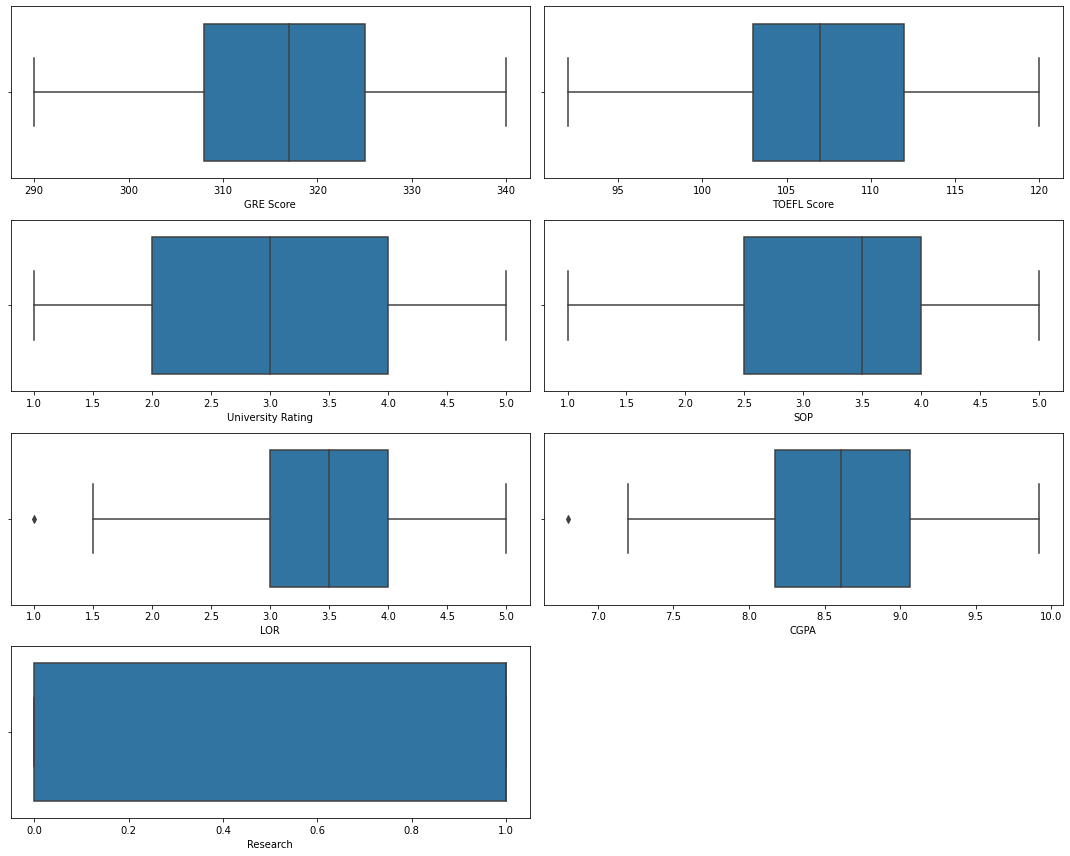

In [38]:
plt.figure(figsize=(15, 12))
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=data[features[i]])
plt.tight_layout()

In [39]:
# observation based on above box plot:
# the outlier observed in boxplot is basically just one applicant having 
       # the lowest LOR rating of 1
       # the lowest CGPA score is 6.8 

## Multi-Variate Analysis

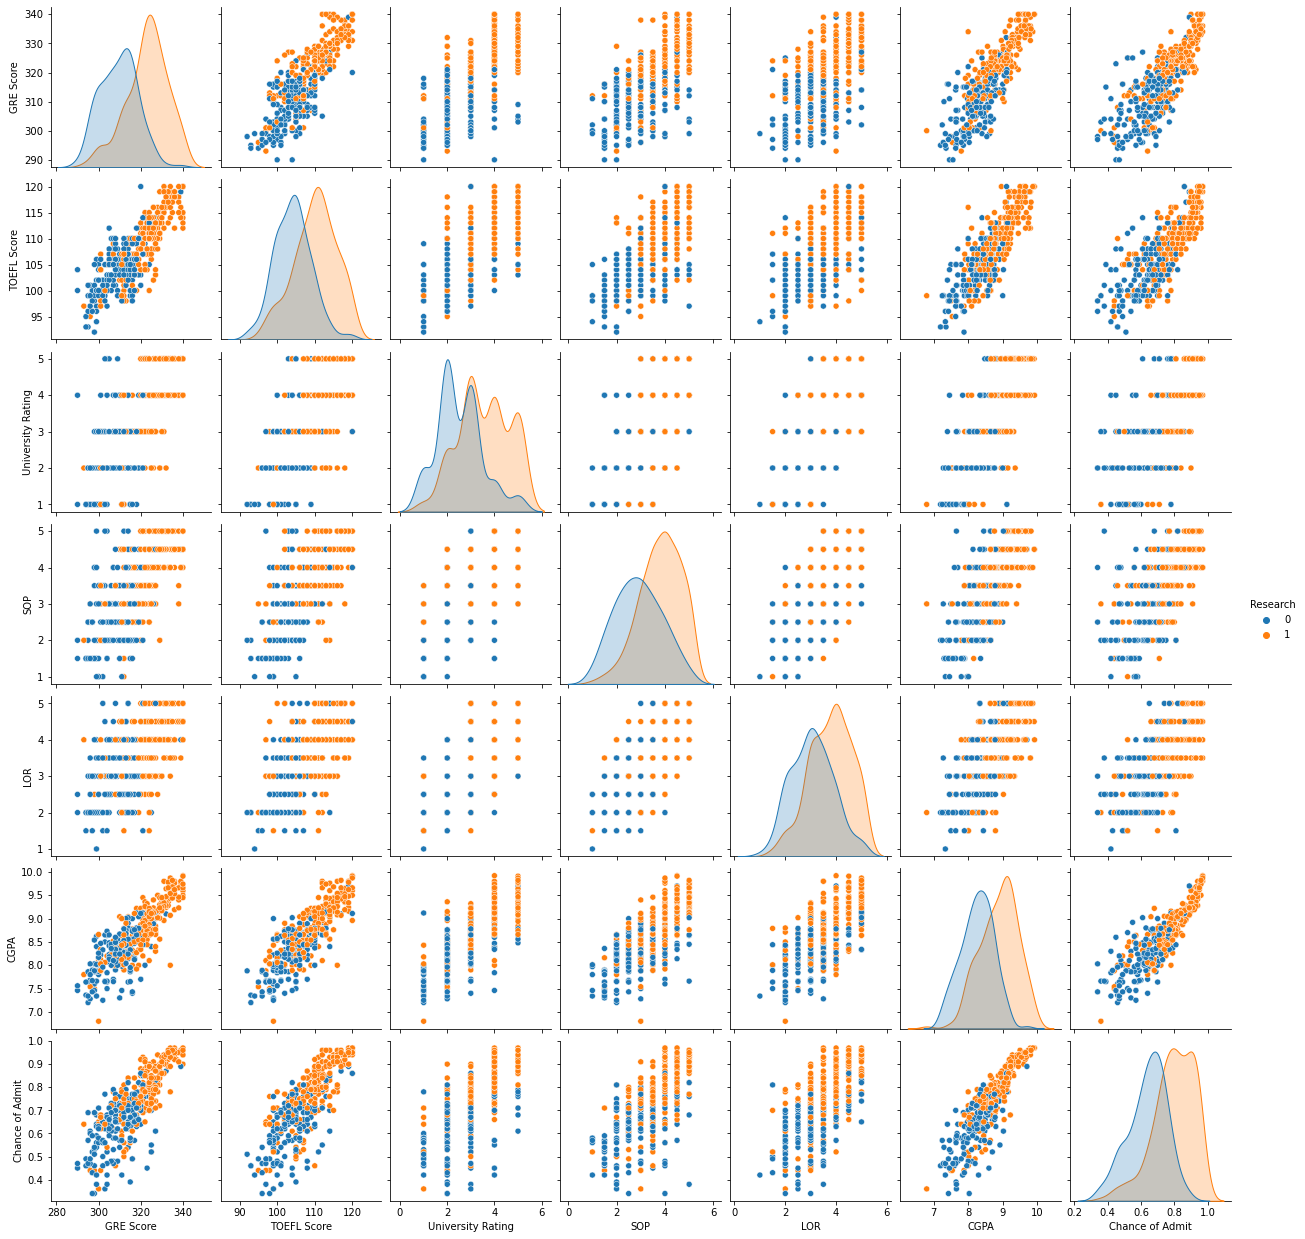

In [40]:
sns.pairplot(data,hue='Research')

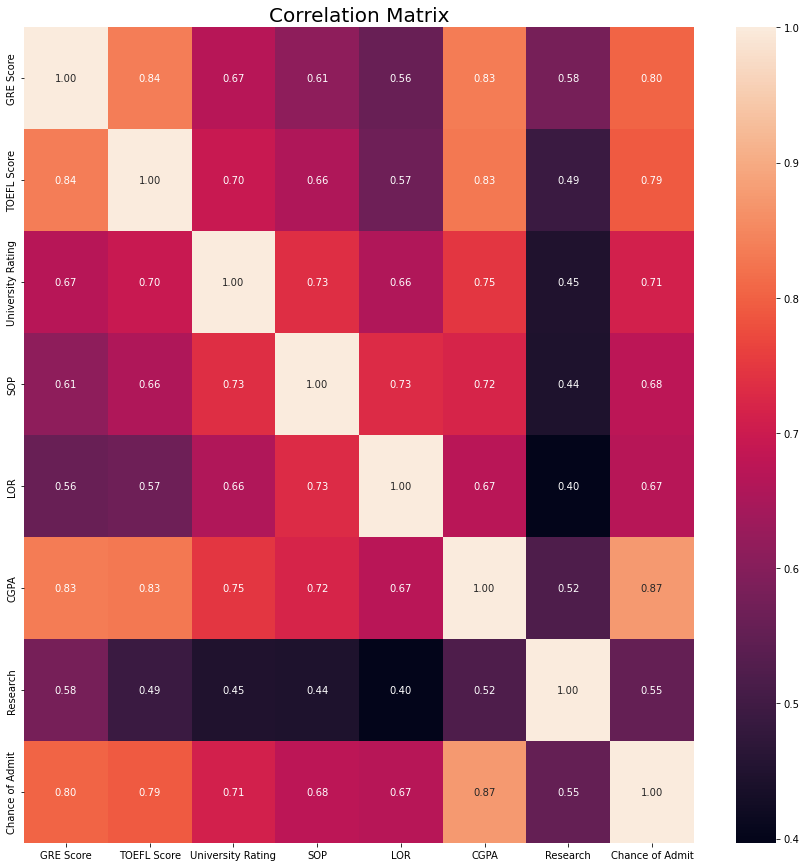

In [41]:
corr_matrix = data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

# Split the data into dependent and independent variables

In [42]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [44]:
x = data.iloc[:,0:7].values


In [45]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [47]:
y=data.iloc[:,7:].values

In [48]:
y

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [49]:
x.shape

(400, 7)

In [50]:
y.shape

(400, 1)

# split the data into training and testing

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                             random_state=10)

In [52]:
y_train=(y_train>0.5)

In [53]:
y_train

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [54]:
y_test=(y_test>0.5)

In [55]:
y_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

# Model building 

## training and testing the model 

Logistic regression

In [56]:
import importlib.util
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [57]:
cls = LogisticRegression(random_state=0)

In [58]:
lr=cls.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
y_pred = lr.predict(x_test)

In [60]:
y_pred

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])